# 555 Timer Calcs

We will be using this design from this Stack Overflow page:
https://electronics.stackexchange.com/questions/112875/astable-555-timing-circuit-0-5-hz-and-50-duty-cycle

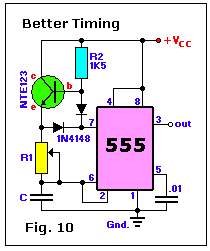

There is no provided frequency formula, and I'd rather not derive it.
Instead, we are going to analyze the simulation data to make sure we have the correct frequency

<Axes: xlabel='time'>

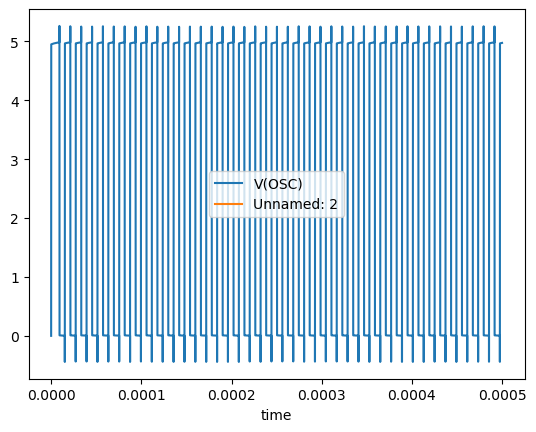

In [110]:
import pandas as pd
import numpy as np
f = 82.2e3  # Hz, measured from real HX6100
df = pd.read_csv("sim.csv", delimiter=";")
df.plot(x="time")

In [111]:
def trigger_points(data, thresh, rising_edge=True):
    sign = data >= thresh
    mask = [1, -1] if rising_edge else [-1, 1]
    pos = np.where(np.convolve(sign, [1, -1]) == 1)
    return pos

rising_edges = df.iloc[trigger_points(df["V(OSC)"], 2)]
rising_edges

,time,V(OSC),Unnamed: 2
17,4.417700e-10,2.14765,NaN
3217,1.516080e-05,2.31850,NaN
5764,2.722150e-05,2.24626,NaN
8303,3.928470e-05,2.45921,NaN
10839,5.134730e-05,2.21762,NaN
13366,6.340430e-05,2.35392,NaN
15877,7.546050e-05,2.36043,NaN
18405,8.752340e-05,2.27647,NaN
20934,9.958270e-05,2.31220,NaN
23453,1.116450e-04,2.31315,NaN


In [112]:
diff = rising_edges.diff()["time"]
f_avg = (1/diff).mean()
f_std = (1/diff).std()
f"f_avg: {f_avg/1000:.3f}kHz", f"f_std: {f_std/1000:.3f}kHz", f"error: {100*(f_avg/f - 1):.3f}%"

('f_avg: 82.500kHz', 'f_std: 2.647kHz', 'error: 0.365%')